## Portfolio Part 2

Student Name: *Umut Demirhan* 

Student ID: *46739106*

The goal of the second Portfolio task is to train linear regression models to predict users' ratings towards movies. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will continue using the movielens dataset provided in Portfolio task 1. 

### Import Cleaned MovieLens Dataset
Save the cleaned data (i.e., after removing missing values and outliers) in the Portfolio task 1 as a csv file named 'movielens_data_clean.csv'. You may need to use the Pandas method, i.e., `to_csv`, for doing this. After that, please import the csv file (i.e., 'movielens_data_clean') and print out its total length.

In [1]:
# Importing necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
plt.rcParams['figure.figsize'] = 25,9
%matplotlib inline

In [2]:
# importing the dataframe and printing the lenght
movielens_data_clean = pd.read_csv('files/movielens_data_clean.csv')
print('The length of data is ',  len(movielens_data_clean))

The length of data is  96854


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column. 
* As our goal is to predict ratings given other columns, please get the correlations between age/gender/genre/occupation and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, genre and occupation) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [3]:
movielens_data_clean.head()

,userId,age,gender,occupation,movieId,rating,genre,timestamp
0,196,49.0,M,writer,242,3.0,Comedy,881250949
1,22,25.0,M,writer,377,1.0,Children,878887116
2,244,28.0,M,technician,51,2.0,Romance,880606923
3,298,44.0,M,executive,474,4.0,War,884182806
4,253,26.0,F,librarian,465,5.0,Adventure,891628467


In [4]:
movielens_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96854 entries, 0 to 96853
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   userId      96854 non-null  int64  
 1   age         96854 non-null  float64
 2   gender      96854 non-null  object 
 3   occupation  96854 non-null  object 
 4   movieId     96854 non-null  int64  
 5   rating      96854 non-null  float64
 6   genre       96854 non-null  object 
 7   timestamp   96854 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 5.9+ MB


In [5]:
# impoting OrdinalEncoder from sklearn
from sklearn.preprocessing import OrdinalEncoder
# Using OrdinalEncoder to convert the related categorical features into numerial values
ord_enc = OrdinalEncoder()
movielens_data_clean["gender_code"] = ord_enc.fit_transform(movielens_data_clean[["gender"]])
movielens_data_clean["occupation_code"] = ord_enc.fit_transform(movielens_data_clean[["occupation"]])
movielens_data_clean["genre_code"] = ord_enc.fit_transform(movielens_data_clean[["genre"]])
movielens_data_clean.head()

,userId,age,gender,occupation,movieId,rating,genre,timestamp,gender_code,occupation_code,genre_code
0,196,49.0,M,writer,242,3.0,Comedy,881250949,1.0,19.0,4.0
1,22,25.0,M,writer,377,1.0,Children,878887116,1.0,19.0,3.0
2,244,28.0,M,technician,51,2.0,Romance,880606923,1.0,18.0,13.0
3,298,44.0,M,executive,474,4.0,War,884182806,1.0,6.0,16.0
4,253,26.0,F,librarian,465,5.0,Adventure,891628467,0.0,10.0,1.0


In [6]:
# Calculating correlation coefficients between related features
movielens_data_clean[['rating', 'gender_code', 'occupation_code', 'genre_code', 'age']].corr()

,rating,gender_code,occupation_code,genre_code,age
rating,1.000000,-0.007239,-0.033717,0.045250,0.051724
gender_code,-0.007239,1.000000,0.012117,-0.000509,0.037126
occupation_code,-0.033717,0.012117,1.000000,-0.011443,-0.370879
genre_code,0.045250,-0.000509,-0.011443,1.000000,0.027286
age,0.051724,0.037126,-0.370879,0.027286,1.000000


### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set. 
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data. 
* Print the shape of training and testing sets in the two cases. 

In [7]:
# Case 1: Creating a varieble that contains 10% of training data, randomly selected from the entire data;
# the remain 90% data is the testing data
train1, test1 = train_test_split(movielens_data_clean, train_size=0.1, random_state=43)
print(train1.shape)
print(test1.shape)


(9685, 11)
(87169, 11)


In [8]:
# Case 1: Creating a varieble that contains 90% of training data, randomly selected from the entire data;
# the remain 10% data is the testing data
train2, test2 = train_test_split(movielens_data_clean, train_size=0.9, random_state=43)
print(train2.shape)
print(test2.shape)

(87168, 11)
(9686, 11)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results. 
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively. 
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [9]:
# (model-a) using the training/testing data in case 1 with two most correlated input features
# Assigning related features as X variable and rating feature to be Y  for both train and test data sets
X_train_most1 = train1[['genre_code', 'age']]
y_train_most1 = train1['rating']
# for testing
X_test_most1 = test1[['genre_code', 'age']]
y_test_most1 = test1['rating']
# Training the regression model
reg = linear_model.LinearRegression()
reg.fit(X_train_most1, y_train_most1)
#Calculating the MSE, Root MSE and R^2 using 'mean_squared_error' and 'r2_score' functions
from sklearn.metrics import mean_squared_error
predicted_ma = reg.predict(X_test_most1)
mse_ma = mean_squared_error(y_test_most1, predicted_ma)
r2_ma = r2_score(y_test_most1, predicted_ma)
print("MSE:", mse_ma)
print("Root MSE:", np.sqrt(mse_ma))
print("R Squared:", r2_ma)

MSE: 1.2394616307854138
Root MSE: 1.113311111408403
R Squared: 0.004016896334950171


In [10]:
# (model-b) using the training/testing data in case 1 with two least correlated input features
# Assigning related features as X variable and rating feature to be Y  for both train and test data sets
X_train_least1 = train1[['gender_code', 'occupation_code']]
y_train_least1 = train1['rating']
# for testing
X_test_least1 = test1[['gender_code', 'occupation_code']]
y_test_least1 = test1['rating']
# Training the regression model
reg = linear_model.LinearRegression()
reg.fit(X_train_least1, y_train_least1)
#Calculating the MSE, Root MSE and R^2 using 'mean_squared_error' and 'r2_score' functions
predicted_mb = reg.predict(X_test_least1)
mse_mb = mean_squared_error(y_test_least1, predicted_mb)
r2_mb = r2_score(y_test_least1, predicted_mb)
print("MSE:", mse_mb)
print("Root MSE:", np.sqrt(mse_mb))
print("R Squared:", r2_mb)

MSE: 1.2434131546160223
Root MSE: 1.115084371075132
R Squared: 0.0008416056512666747


In [11]:
# model-c) using the training/testing data in case 2 with two most correlated input features,
# Assigning related features as X variable and rating feature to be Y  for both train and test data sets
X_train_most2 = train2[['genre_code', 'age']]
y_train_most2 = train2['rating']
# for testing
X_test_most2 = test2[['genre_code', 'age']]
y_test_most2 = test2['rating']
# Training the regression model
reg = linear_model.LinearRegression()
reg.fit(X_train_most2, y_train_most2)
#Calculating the MSE, Root MSE and R^2 using 'mean_squared_error' and 'r2_score' functions
predicted_mc = reg.predict(X_test_most2)
mse_mc = mean_squared_error(y_test_most2, predicted_mc)
r2_mc = r2_score(y_test_most2, predicted_mc)
print("MSE:", mse_mc)
print("Root MSE:", np.sqrt(mse_mc))
print("R Squared:", r2_mc)

MSE: 1.2237368383214242
Root MSE: 1.1062263955996638
R Squared: 0.001920920645637647


In [12]:
# (model-d) using the training/testing data in case 2 with two least correlated input features
# Assigning related features as X variable and rating feature to be Y  for both train and test data sets
X_train_least2 = train2[['gender_code', 'occupation_code']]
y_train_least2 = train2['rating']
# for testing
X_test_least2 = test2[['gender_code', 'occupation_code']]
y_test_least2 = test2['rating']
# Training the regression model
reg = linear_model.LinearRegression()
reg.fit(X_train_least2,y_train_least2)
#Calculating the MSE, Root MSE and R^2 using 'mean_squared_error' and 'r2_score' functions
predicted_md = reg.predict(X_test_least2)
mse_md = mean_squared_error(y_test_least2, predicted_md)
r2_md = r2_score(y_test_least2, predicted_md)
print("MSE:", mse_md)
print("Root MSE:", np.sqrt(mse_md))
print("R Squared:", r2_md)

MSE: 1.225614398307153
Root MSE: 1.1070747031285437
R Squared: 0.00038958377376641096


### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [13]:
#Printing the results of the four models
print('Performance Results of Each Models;')
print('Model A; MSE:',round(mse_ma,4)," Root MSE:", round(np.sqrt(mse_ma),4),"R^2:", round(r2_ma,4))
print('Model B; MSE:',round(mse_mb,4)," Root MSE:", round(np.sqrt(mse_mb),4),"R^2:", round(r2_mb,4))
print('Model C; MSE:',round(mse_mc,4)," Root MSE:", round(np.sqrt(mse_mc),4),"R^2:", round(r2_mc,4))
print('Model D; MSE:',round(mse_md,4)," Root MSE:", round(np.sqrt(mse_md),4),"R^2:", round(r2_md,4))

Performance Results of Each Models;
Model A; MSE: 1.2395  Root MSE: 1.1133 R^2: 0.004
Model B; MSE: 1.2434  Root MSE: 1.1151 R^2: 0.0008
Model C; MSE: 1.2237  Root MSE: 1.1062 R^2: 0.0019
Model D; MSE: 1.2256  Root MSE: 1.1071 R^2: 0.0004


#### Evaluation of the Performance of the Models

- Comparing Model A and C;
    - The testing data set of Model A much more than the testing data set of Model C,
    - In other words,The training data set of Model C much more than the training data set of Model A,
    - As a result, the MSE of Model A is bigger than the MSE of Model B, so are the root of MSEs,
    - Usually, the bigger data set for training,the lower MSE for predictions.
-Comparing Model A and B;
    - The impact of genre and age on ratings is also quite limited, although larger than gender and occupation, because correlations of genre and age  with ratings are larger than the other two.
- Overall,
    - Ratings get values from 0 to 5, therefore, we can interpret that MSE: 1,2 is quite high.
    - R squared values close to zero, therefore the models are not good for the prediction.


In [14]:
MSEs = {'Model_A':[mse_ma],'Model_B':[mse_mb],'Model_C':[mse_mc],'Model_D':[mse_md]}
MSEs = pd.DataFrame(MSEs)  
Root_MSEs = {'Model_A':[np.sqrt(mse_ma)],'Model_B':[np.sqrt(mse_mb)],'Model_C':[np.sqrt(mse_mc)],'Model_D':[np.sqrt(mse_md)]}
Root_MSEs = pd.DataFrame(Root_MSEs)  
R_squareds = {'Model_A':[r2_ma],'Model_B':[r2_mb],'Model_C':[r2_mc],'Model_D':[r2_md]}
R_squareds = pd.DataFrame(R_squareds)  

### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

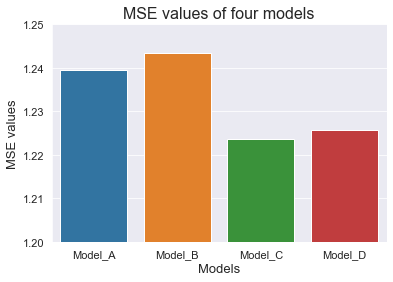

In [28]:
# Plotting the MSE values of the models
sns.set_style('darkgrid')
sns.barplot(data = MSEs )
plt.ylim(1.2,1.25)
plt.ylabel('MSE values', fontsize=13); plt.xlabel('Models', fontsize=13)
plt.title('MSE values of four models', fontsize=16)
plt.xticks(fontsize=11); plt.yticks(fontsize=11)
None

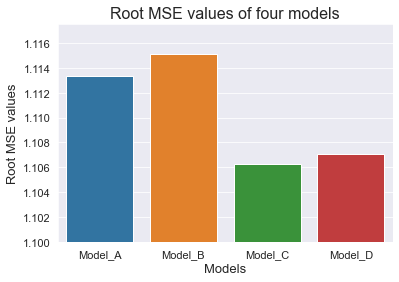

In [27]:
# Plotting the Root MSE values of the models
sns.set_style('darkgrid')
sns.barplot(data=Root_MSEs )
plt.ylim(1.1,1.1175)
plt.ylabel('Root MSE values', fontsize=13); plt.xlabel('Models', fontsize=13)
plt.title('Root MSE values of four models', fontsize=16)
plt.xticks(fontsize=11); plt.yticks(fontsize=11)
None

#### Analysis of the MSE values of the models
- As Model A and Model C include the most correlated features, they are expected to have less MSE, 
- Model C has the lowest MSE, but Model A has higher MSE. It may be the result of having less data for training,
- Model B and D have least correlated features, and yet their MSE values differ maybe due to the size of training data
- Model D has more training data,and its MSE value less than Model B. 
- Similarly, model C has more training data,and its MSE value less than Model A. 
- However, if we change the random state, this figure also changes. it may be affected the size of testing data. 
##### Conclution,
    - For more accurate prediction, we need only to have the most correlated  features , Age and Genre and maybe Occupation features, in our model.
    - Since Gence and Occupation is a categorical features, we should use Logistic Regression model instead of Linear Regression.
    - Using 80 to 90% of our data for training can provide a better result.


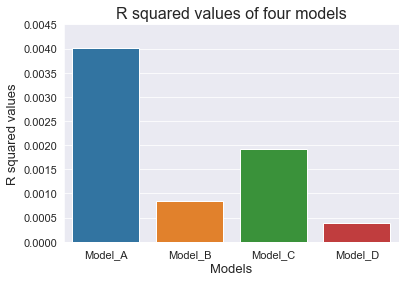

In [31]:
# Plotting the R squared values of the models
sns.set_style('darkgrid')
sns.barplot(data=R_squareds )
plt.ylim(0,0.0045)
plt.ylabel('R squared values', fontsize=13); plt.xlabel('Models', fontsize=13)
plt.title('R squared values of four models', fontsize=16)
plt.xticks(fontsize=11); plt.yticks(fontsize=11)
None

#### Analysis of the R-squared values of the models
- As Model A and C have the most correlated features, their R squared values are higher than the other two models. On the other hand, Having different size of training/testing data affects the R-squared values.
- Model A with less training data and most related features has a higher R-squared than Model C with more training data and the same features. Therefore, R-squared of Model A could be misleading or biased. It also can be said for the Model B as well.Therefore, changing the training/testing rates may affect models' accuracy.
- We can also conclude that the size of training data may affects models differently, and it is better to have more training data than testing data to obtain better prediction models.
- Model C is the best model due to having more training data portion and having most correlated features.
- We have just very few parameters,and use Linear regressions so overfitting is almost impossible in this case.
